<a href="https://colab.research.google.com/github/SumeetCEH/SumeetsAI/blob/main/EDA%2B_Logistic_Regression_%2B_PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [450]:
import pandas as pd

In [451]:
import matplotlib.pyplot as plt


In [452]:
import seaborn as sns

In [453]:
import numpy as np

In [454]:
from sklearn.preprocessing import StandardScaler

In [455]:
sc= StandardScaler()

In [456]:
df=pd.read_csv('/content/adult.csv')

In [457]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [458]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [460]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [461]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [462]:
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education.num,16
marital.status,7
occupation,15
relationship,6
race,5
sex,2


In [463]:
df.size

488415

In [464]:
df.shape

(32561, 15)

In [465]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


<Axes: xlabel='age', ylabel='Count'>

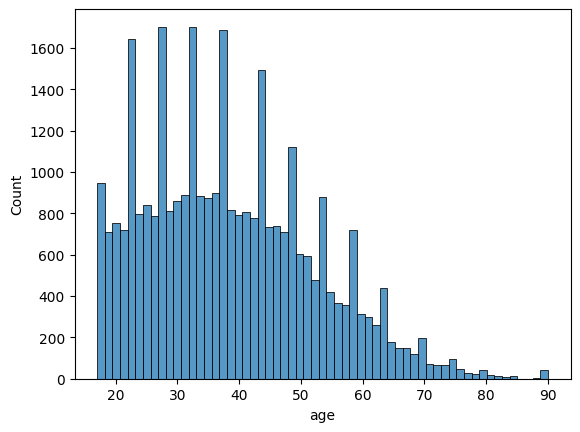

In [466]:
sns.histplot(df['age'])

<Axes: xlabel='count', ylabel='sex'>

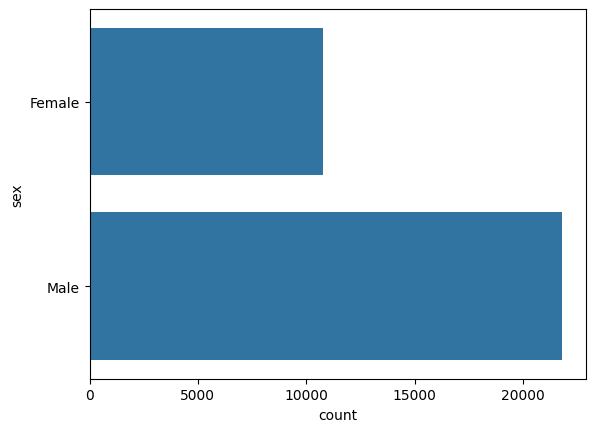

In [467]:
sns.countplot(df['sex'])

<Axes: xlabel='income', ylabel='Count'>

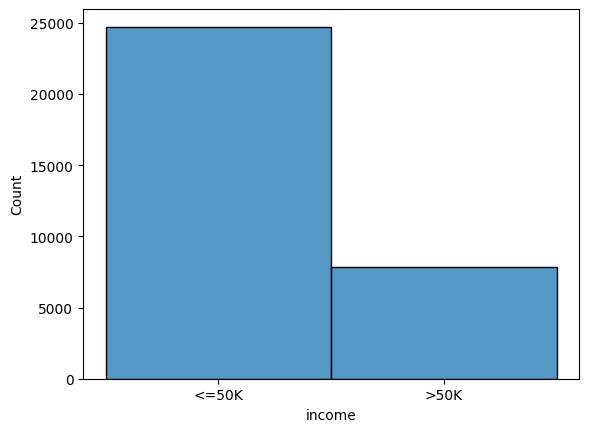

In [468]:
sns.histplot(df['income'])

<Axes: xlabel='sex', ylabel='income'>

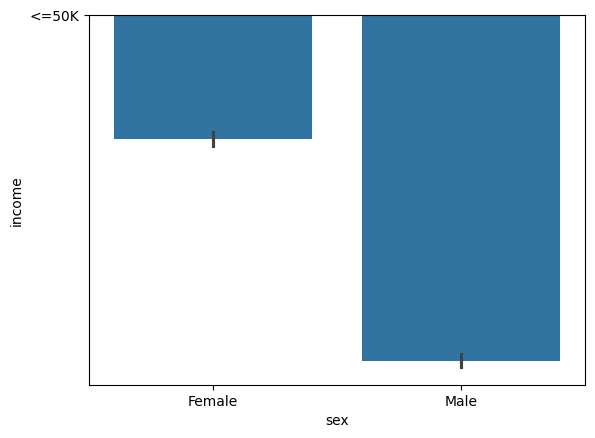

In [469]:
sns.barplot(x='sex',y='income',data=df)

In [470]:
df.groupby('sex').size()

,0
sex,
Female,10771
Male,21790


In [471]:
df['sex'].value_counts()

,count
sex,
Male,21790
Female,10771


In [472]:
lable_df=df['sex'].value_counts().index

In [473]:
value_df=df['sex'].value_counts().values

([<matplotlib.patches.Wedge at 0x7ca779fa6b10>,
 [Text(-0.5575806930085762, 0.948210826126804, 'Male'),
  Text(0.5575805498327184, -0.9482109103191355, 'Female')],
 [Text(-0.3041349234592233, 0.5172059051600748, '66.92%'),
  Text(0.30413484536330093, -0.5172059510831648, '33.08%')])

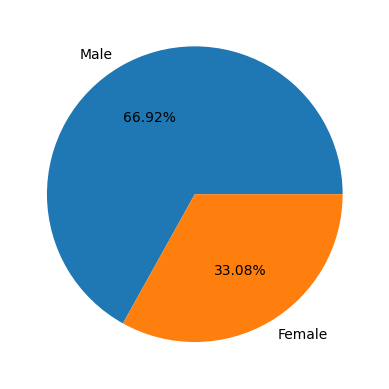

In [474]:
plt.pie(labels=lable_df,x=value_df,autopct='%1.2f%%')

In [475]:
df.corr(numeric_only=True)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [476]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [478]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [479]:
df['workclass']=le.fit_transform(df['workclass'])

In [480]:
df['education']=le.fit_transform(df['education'])

In [481]:
df['marital.status']=le.fit_transform(df['marital.status'])

In [482]:
df['race']=le.fit_transform(df['race'])

In [483]:
df['sex']=le.fit_transform(df['sex'])

In [484]:
df['native.country']=le.fit_transform(df['native.country'])

In [485]:
df['relationship']=le.fit_transform(df['relationship'])

In [486]:
df['occupation']=le.fit_transform(df['occupation'])

In [487]:
df['income']=le.fit_transform(df['income'])

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [489]:
X=df.drop('income',axis=1)

In [490]:
X=sc.fit_transform(X)

In [491]:
y=df['income']

In [492]:
X

array([[ 3.76961234, -2.65732045, -1.06799736, ..., 10.59350656,
        -0.03542945,  0.29156857],
       [ 3.18311167,  0.09005041, -0.53916866, ..., 10.59350656,
        -1.81720429,  0.29156857],
       [ 2.01011032, -2.65732045, -0.03521956, ..., 10.59350656,
        -0.03542945,  0.29156857],
       ...,
       [ 0.10398314,  0.09005041, -0.33543266, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857]])

In [493]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [494]:
df['income'].value_counts()

,count
income,
0,24720
1,7841


In [495]:
from sklearn.model_selection import train_test_split


In [496]:
from imblearn.over_sampling import SMOTE

In [497]:
sm= SMOTE(random_state=42)

In [498]:
X_res, y_res = sm.fit_resample(X, y)

In [499]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.33, random_state=42)

In [500]:
X_test.shape

(16316, 14)

In [501]:
X_train.shape

(33124, 14)

In [502]:
y_test.shape

(16316,)

In [503]:
y_train.shape

(33124,)

In [504]:
from sklearn.ensemble import RandomForestClassifier

In [505]:
rfc=RandomForestClassifier()

In [506]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [507]:
y_pred=rfc.predict(X_test)

In [508]:
from sklearn.metrics import accuracy_score

In [509]:
accuracy_score(y_test,y_pred)

0.8926820299092915

In [510]:
from sklearn.decomposition import PCA
pca=PCA()
X_train =pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.15549458, 0.12656913, 0.09740817, 0.08287277, 0.08013824,
       0.07329814, 0.06688162, 0.05732689, 0.05514227, 0.05389594,
       0.05013141, 0.04157155, 0.03841175, 0.02085755])

In [511]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
dim= np.argmax(cumsum>=0.95)+1
print('The number of dimensions requireds to preserve 90% of variance is',dim)

The number of dimensions requireds to preserve 90% of variance is 13


In [512]:
X=df.drop(['income','native.country'],axis=1)

In [513]:
X=sc.fit_transform(X)

In [514]:
y=df['income']

In [515]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [516]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [517]:
X

array([[ 3.76961234, -2.65732045, -1.06799736, ..., -0.14592048,
        10.59350656, -0.03542945],
       [ 3.18311167,  0.09005041, -0.53916866, ..., -0.14592048,
        10.59350656, -1.81720429],
       [ 2.01011032, -2.65732045, -0.03521956, ..., -0.14592048,
        10.59350656, -0.03542945],
       ...,
       [ 0.10398314,  0.09005041, -0.33543266, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.14592048,
        -0.21665953, -1.65522476]])

In [518]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [519]:
import keras
from keras import layers
from keras import ops

In [520]:
model=keras.Sequential()

In [521]:
model.add(
    keras.Input(
    shape=(13,),
    batch_size=32
))

In [522]:
model.add(
    keras.layers.Dense(
        64,
        activation='relu'
    )
)

In [523]:
model.add(
    keras.layers.Dense(
        128,
        activation='relu'
    )
)

In [524]:
model.add(
    keras.layers.Dense(
        1,
        activation='sigmoid'
    )
)

In [525]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (32, 64)               │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 128)              │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [526]:
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [527]:
callback=keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)

In [528]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose="auto",
    validation_data=(X_test,y_test),
    shuffle=True,
    callbacks=[callback]
)

Epoch 1/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8223 - loss: 0.3961 - val_accuracy: 0.8451 - val_loss: 0.3287
Epoch 2/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8496 - loss: 0.3229 - val_accuracy: 0.8479 - val_loss: 0.3235
Epoch 3/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8522 - loss: 0.3164 - val_accuracy: 0.8487 - val_loss: 0.3235
Epoch 4/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8502 - loss: 0.3181 - val_accuracy: 0.8510 - val_loss: 0.3212
Epoch 5/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8521 - loss: 0.3208 - val_accuracy: 0.8503 - val_loss: 0.3202
Epoch 6/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8555 - loss: 0.3159 - val_accuracy: 0.8476 - val_loss: 0.3252
Epoch 7/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8526 - loss: 0.3130 - val_accuracy: 0.8491 - val_loss: 0.3197


In [529]:
model.evaluate(X_test,y_test)

336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8491 - loss: 0.3230


[0.32117804884910583, 0.8510143160820007]